<a href="https://colab.research.google.com/github/Jmarsaki/Jmarsaki/blob/main/Continuaci%C3%B3n_y_soluci%C3%B3n_definitiva_cambio_de_curricula_digital_proyecto1_JMSACHI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Replanteo del problema de la predicción de necesidad de cambio de curricula digital*

Este nuevo replanteo del problema de la predicción de condiciones ideales para un cambio de curricula digital, se orientará explorar las posibilidades de un modelo basado en el algoritmo de la regresión logística.

Se constato que se posee una multiplicidad de variables que no estan linealmente 
correlacionadas y por ello exploraremos relaciones basadas en el algoritmo de 
la regresión logística. Se elegirá, posterior a un analisís, un variable predictora numerica continua, que ajustada sirva para configurar la variable objeto, que será categórica, delimitando la clase de alumnos altamente formados en ciertas competencias digitales, y con calificación igual o mayor que 7, frente a aquella clase de alumnos de baja formación menor que 7 confrontandola con los valores de las columnas Resp_tec y Comp_IT que poseen valores categóricos referidos al grado de ciertas habilidades prácticas de dichos alumnos.

La predicción de los casos positivos debe servir para para determinar si la currícula posee los contenidos "digitalizacionistas" suficientes para conservarse, o ameritan la introducción de cambios en un momento de tiempo determinado, prediciendo así ese cambio.

La Regresión Logística Simple, desarrollada por David Cox en 1958, es un método de regresión que permite estimar la probabilidad de una variable cualitativa binaria en función de una variable cuantitativa. Una de las principales aplicaciones de la regresión logística es la de clasificación binaria, en el que las observaciones se clasifican en un grupo u otro dependiendo del valor que tome la variable empleada como predictor. 

Es importante tener en cuenta que, aunque la regresión logística permite clasificar, se trata de un modelo de regresión que modela el logaritmo de la probabilidad de pertenecer a cada grupo. La asignación final se hace en función de las probabilidades predichas.

La existencia de una relación significativa entre una variable cualitativa con dos niveles y una variable continua se puede estudiar mediante otros test estadísticos tales como t-test o ANOVA (un ANOVA de dos grupos es equivalente al t-test). Sin embargo, la regresión logística permite además calcular la probabilidad de que la variable dependiente pertenezca a cada una de las dos categorías en función del valor que adquiera la variable independiente. Supóngase que se quiere estudiar la relación entre los niveles de colesterol y los ataques de corazón. Para ello, se mide el colesterol de un grupo de personas y durante los siguientes 20 años se monitoriza que individuos han sufrido un ataque. Un t-test entre los niveles de colesterol de las personas que han sufrido ataque vs las que no lo han sufrido permitiría contrastar la hipótesis de que el colesterol y los ataques al corazón están asociados. Si además se desea conocer la probabilidad de que una persona con un determinado nivel de colesterol sufra un infarto en los próximos 20 años, o poder conocer cuánto tiene que reducir el colesterol un paciente para no superar un 50% de probabilidad de padecer un infarto en los próximos 20 años, se tiene que recurrir a la regresión logística. En este caso la muestra es pequeña, siendo 266 registros para poder comprender el ejercicio, pero para conseguir buenos resultados siempre es mejor contar con un número abundante de datos que darán mayor exactitud a las predicciones y evitarán problemas de overfitting u underfitting. (Por decir algo, de mil a 5 mil registros no estaría mal). A continuación se presenteran cada etapa o paso necesario para la implementación del problema en un determinado algoritmo de machine learning. Primero se importan las librerías y se recuperan las variables para conformar la variable predictora

#     MODELO APLICANDO REGRESIÓN LOGÍSTICA

**Importar los módulos de librerias requeridos**

In [ ]:
# importación de librerias
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

**Se generará el dataset**

In [ ]:
# Se suben los datos
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving DF_GradRespTecn2.csv to DF_GradRespTecn2.csv
User uploaded file "DF_GradRespTecn2.csv" with length 8715 bytes


In [ ]:
# Se crea el dataframe
import pandas as pd
import numpy as np
df=pd.read_csv("DF_GradRespTecn2.csv")
df=df.replace(np.nan,"0")
df

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


In [ ]:
db= df[["promedio", "Comp_TI"]]
db

,promedio,Comp_TI
0,4.000000,1
1,4.000000,1
2,6.333333,1
3,9.000000,1
4,4.000000,1
...,...,...
261,3.666667,1
262,9.333333,1
263,7.000000,0
264,6.000000,1


In [ ]:
db=df.dropna() 
db

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


In [ ]:
db.isna().value_counts(dropna=False)

Validar_inf  Uso_adecuado_tecnologíaadt  Espacios_virtuales  promedio  Resp_tec  Comp_TI
False        False                       False               False     False     False      266
dtype: int64

La columna "promedio" (variabe predictora suma de las variables tenidas en cuenta) es continua, mientras "Resp_tec" o Comp_IT (variables objetos) eran discretas, con los siguientes valores a la etiqueta:
0–
1–
2-
3-
4

Las clases serián:

"0" : No hay datos

"1" : Con ayuda de otros, puedo identificar herramientas digitales sencillas y posibles respuestas tecnológicas para resolver esas necesidades

"2" : Por mi cuenta, puedo seleccionar algunas herramientas digitales y posibles respuestas tecnológicas para resolver esas necesidades

"3" : Incluyendo el apoyo a otros, puedo aplicar diferentes herramientas digitales y posibles respuestas tecnológicas para resolver necesidades digitales

"4" : En un nivel altamente especializado, puedo crear soluciones a problemas críticos relacionados con el uso de herramientas digitales y posibles respuestas tecnológicas, y adaptar y personalizar los entornos digitales a las necesidades personales


Se tomaron estas clases y se las redujo a solo dos: 

"1": Al menos puedo seleccionar algunas herramientas digitales y posibles respuestas tecnológicas para resolver necesidades digitales, solo por mi cuenta.

"0": Otro caso.

**Calcular parámetros estadísticos**

In [ ]:
df.describe() 

,Validar_inf,Uso_adecuado_tecnologíaadt,promedio,Resp_tec,Comp_TI
count,266.000000,266.000000,266.000000,266.000000,266.000000
mean,7.063910,6.793233,6.763158,0.740602,0.827068
std,2.656365,2.737323,2.353837,0.439131,0.378902
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,5.000000,5.000000,0.000000,1.000000
50%,8.000000,7.000000,7.333333,1.000000,1.000000
75%,9.000000,9.000000,8.500000,1.000000,1.000000
max,10.000000,10.000000,10.000000,1.000000,1.000000


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


**Separar columnas a utilizar**

In [ ]:
db[["promedio",	"Comp_TI"]]

,promedio,Comp_TI
0,4.000000,1
1,4.000000,1
2,6.333333,1
3,9.000000,1
4,4.000000,1
...,...,...
261,3.666667,1
262,9.333333,1
263,7.000000,0
264,6.000000,1


**Se realiza la limpieza de datos**

**Visualización de de las clases "0" y clase "1", "2", "3" y "4" la variable **

 Para una visualización y mejor comprensión de las características de la información con la que se trabaja y su correlación, se desarrolla la parte gráfica

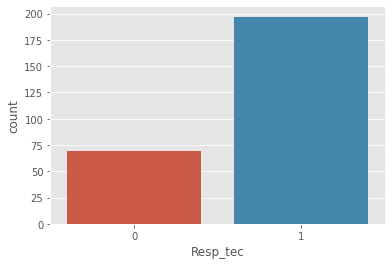

In [ ]:
sns.countplot(x="Resp_tec", data=df)

De esto se deduce que el conjunto de que la cantidad de casos "0" es menor que los casos de la clase "1".

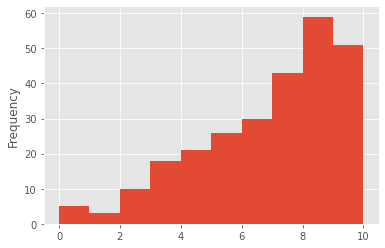

In [ ]:
df["promedio"].plot.hist()

**Se calcula la regresión logistica aplicando su algoritmo y se clasifica y entrena el algoritmo**

---

In [ ]:
X= db.drop("Comp_TI", axis=1)
y= db["Comp_TI"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2 , random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

**Se aplica finalmente el algoritmo**

In [ ]:
logmodel=LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logmodel.score

<bound method ClassifierMixin.score of LogisticRegression()>

In [ ]:
predictions=logmodel.predict(X_train)

In [ ]:
predictions_test=logmodel.predict(X_test)

In [ ]:
print('accuracy in train:', accuracy_score(predictions, y_train))

accuracy in train: 0.8341708542713567


In [ ]:
print('accuracy in test:', accuracy_score(predictions_test, y_test))

accuracy in test: 0.8208955223880597


**Se hacen predicciones usando el modelo**


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
A=y_test.to_numpy()

In [ ]:
A

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
predictions_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

***Resultado de la evaluación del modelo***

In [ ]:
target_names = ["fiable", "no_fiable"]
print(classification_report(predictions_test, y_test, target_names=target_names))

              precision    recall  f1-score   support

      fiable       0.22      0.50      0.31         4
   no_fiable       0.96      0.86      0.91        50

    accuracy                           0.83        54
   macro avg       0.59      0.68      0.61        54
weighted avg       0.90      0.83      0.86        54



In [ ]:
# Error de entrenamiento del modelo 
#-------------------------------------------------------------------------------
prediction = logmodel.predict(X = X_train)

rmse = mean_squared_error(
        y_true  = y_train,
        y_pred  = prediction,
        squared = True
       )

print(f"El error (rmse) de train es: {rmse}")

El error (rmse) de train es: 0.1658291457286432


In [ ]:
# Error de test del modelo 
#-------------------------------------------------------------------------------
prediction = logmodel.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = prediction,
        squared = True
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.1791044776119403


**Ahora se calcula la matríz de confusión** 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:


confusion_matrix(predictions_test, y_test)

array([[ 2,  2],
       [ 7, 43]])

Esto quiere decir que la eficiencia en la predicción, que es superior al 82 %,  es alta del modelo para predecir los casos positivos com promedio mayor o igual que 7 de promedio es satisfactoria, por lo que su error medio no supera el 18%, por lo tanto creeemos que el modelo cumple con las expectativas. Ahora compararemos estos resultados con otros donde se aplican otro tipo de algoritmos del machine learning.

# **COMPARACIÓN CON LA APLICACIÓN DE OTROS MODELOS**

# **MODELO APLICANDO ÁRBOL DE DECISIÓN**



Se importan los módulos de librerias requeridos

In [ ]:
# importación de librerias
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
#===============================================================================
# Configuración de más librería Sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont


**Se generará el dataset**

Se introducen o suben los datos en formato CSV

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving DF_GradRespTecn2.csv to DF_GradRespTecn2 (1).csv
User uploaded file "DF_GradRespTecn2.csv" with length 8715 bytes


Se crea el dataframe

In [ ]:
# Crear dataframe
import pandas as pd
df=pd.read_csv("DF_GradRespTecn2.csv")
df=df.replace(np.nan,"0")
df

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


In [ ]:
db=df.dropna() 
db

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


Se elegirá como variable predictora "promedio" y como variable objeto a "Comp_TI".

In [ ]:
db= df[["promedio", "Comp_TI"]]
db

,promedio,Comp_TI
0,4.000000,1
1,4.000000,1
2,6.333333,1
3,9.000000,1
4,4.000000,1
...,...,...
261,3.666667,1
262,9.333333,1
263,7.000000,0
264,6.000000,1


**Se realiza la limpieza de datos**

In [ ]:
db.isna().value_counts(dropna=False)

promedio  Comp_TI
False     False      266
dtype: int64

**Se separan los datos de la variable predictora de la variable objeto (se toma Comp_TI)**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        db.drop(columns = 'Comp_TI'),
                                        db['Comp_TI'],
                                        random_state = 123
                                    )

# One-hot-encoding de las variables categóricas
# ------------------------------------------------------------------------------
# Se identifica el nobre de las columnas numéricas y categóricas
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

# Se aplica one-hot-encoding solo a las columnas categóricas
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )

# Una vez que se ha definido el objeto ColumnTransformer, con el método fit()
# se aprenden las transformaciones con los datos de entrenamiento y se aplican a
# los dos conjuntos con transform(). Ambas operaciones a la vez con fit_transform().
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [ ]:
X= db.drop("Comp_TI", axis=1)
y= db["Comp_TI"]

In [ ]:
# X_train y y_train es para entrenamiento
# X_test y y_test es para prueba
X_train, y_train, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=30)

In [ ]:
db


,promedio,Comp_TI
0,4.000000,1
1,4.000000,1
2,6.333333,1
3,9.000000,1
4,4.000000,1
...,...,...
261,3.666667,1
262,9.333333,1
263,7.000000,0
264,6.000000,1


In [ ]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        db.drop(columns = "Comp_TI"),
                                        db["Comp_TI"],
                                        random_state = 50
                                    )
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeRegressor(
            max_depth         = 30,
            random_state      = 100
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30, random_state=100)

Profundidad del árbol: 9
Número de nodos terminales: 28


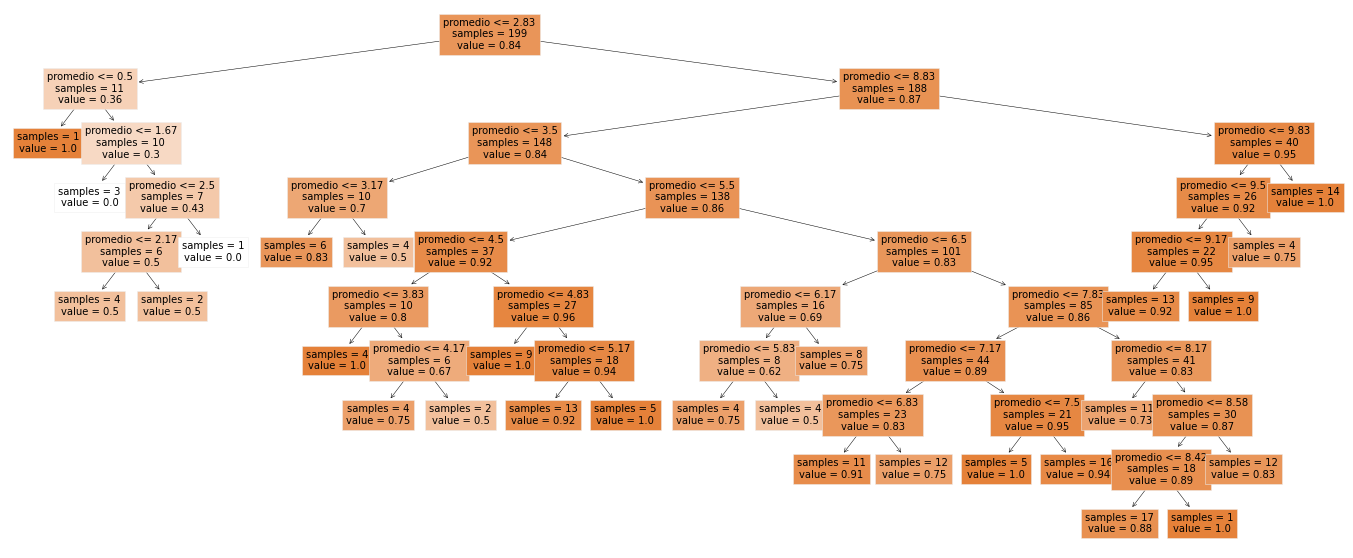

In [ ]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(24, 10))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = db.drop(columns = "Comp_TI").columns,
            class_names   = 'Comp_TI',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [ ]:
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = list(db.drop(columns = "Comp_TI").columns)
               )
print(texto_modelo)

|--- promedio <= 2.83
|   |--- promedio <= 0.50
|   |   |--- value: [1.00]
|   |--- promedio >  0.50
|   |   |--- promedio <= 1.67
|   |   |   |--- value: [0.00]
|   |   |--- promedio >  1.67
|   |   |   |--- promedio <= 2.50
|   |   |   |   |--- promedio <= 2.17
|   |   |   |   |   |--- value: [0.50]
|   |   |   |   |--- promedio >  2.17
|   |   |   |   |   |--- value: [0.50]
|   |   |   |--- promedio >  2.50
|   |   |   |   |--- value: [0.00]
|--- promedio >  2.83
|   |--- promedio <= 8.83
|   |   |--- promedio <= 3.50
|   |   |   |--- promedio <= 3.17
|   |   |   |   |--- value: [0.83]
|   |   |   |--- promedio >  3.17
|   |   |   |   |--- value: [0.50]
|   |   |--- promedio >  3.50
|   |   |   |--- promedio <= 5.50
|   |   |   |   |--- promedio <= 4.50
|   |   |   |   |   |--- promedio <= 3.83
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |--- promedio >  3.83
|   |   |   |   |   |   |--- promedio <= 4.17
|   |   |   |   |   |   |   |--- value: [0.75]
|   |   |   |

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': db.drop(columns = "Comp_TI").columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,promedio,1.0


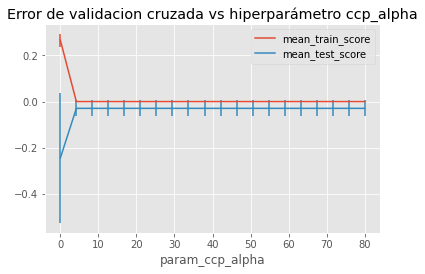

In [ ]:
# Pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [ ]:
drop_elements = []
Comp_TI = db.drop(drop_elements, axis = 1)

In [ ]:
db[["Comp_TI"]]
db

,promedio,Comp_TI
0,4.000000,1
1,4.000000,1
2,6.333333,1
3,9.000000,1
4,4.000000,1
...,...,...
261,3.666667,1
262,9.333333,1
263,7.000000,0
264,6.000000,1


In [ ]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(Comp_TI))
depth_range = range(1, max_attributes + 1)
 
 
accuracies = list()
max_attributes = len(list(Comp_TI))
depth_range = range(1, max_attributes + 1)
 
# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(Comp_TI):
        f_train = Comp_TI.loc[train_fold] 
        f_valid = Comp_TI.loc[valid_fold] 
 
        model = tree_model.fit(X = f_train.drop(['Comp_TI'], axis=1), 
                               y = f_train["Comp_TI"]) 
        valid_acc = model.score(X = f_valid.drop(['Comp_TI'], axis=1), 
                                y = f_valid["Comp_TI"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dt = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dt = dt[["Max Depth", "Average Accuracy"]]
print(dt.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.827066
         2          0.823219


In [ ]:
# Error de test del modelo 
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = True
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.23004659485662274


In [ ]:
# Error de entrenamiento del modelo 
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_train)

rmse = mean_squared_error(
        y_true  = y_train,
        y_pred  = predicciones,
        squared = True
       )

print(f"El error (rmse) de train es: {rmse}")

El error (rmse) de train es: 0.1012023558764617


In [ ]:
X_train

,promedio
209,9.666667
12,8.000000
202,7.666667
82,6.000000
223,9.666667
...,...
229,7.666667
70,8.333333
132,7.000000
109,6.333333


In [ ]:
X_test

,promedio
88,8.000000
151,8.000000
190,10.000000
127,2.666667
63,9.333333
...,...
157,6.000000
8,2.666667
155,8.000000
96,4.333333


In [ ]:
y_train

209    1
12     1
202    1
82     0
223    1
      ..
229    1
70     1
132    1
109    1
176    1
Name: Comp_TI, Length: 199, dtype: int64

In [ ]:
y_test

88     0
151    1
190    1
127    1
63     1
      ..
157    1
8      1
155    1
96     1
215    0
Name: Comp_TI, Length: 67, dtype: int64

Este modelo tiene los errores de entrenamiento y testeo menor al 24% y las accuracy de entrenamiento y testeo superior al 82% por ciento. Se puede decir que este modelo cumple también las expectativas.

In [ ]:
# Pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = 3,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 50
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )
grid 

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_depth=3, random_state=50),
             param_grid={'ccp_alpha': array([ 0.        ,  4.21052632,  8.42105263, 12.63157895, 16.84210526,
       21.05263158, 25.26315789, 29.47368421, 33.68421053, 37.89473684,
       42.10526316, 46.31578947, 50.52631579, 54.73684211, 58.94736842,
       63.15789474, 67.36842105, 71.57894737, 75.78947368, 80.        ])},
             return_train_score=True)

# **MODELO CON CLUSTERING**

Modelización no supervizada



**Importar los módulos de librerias requeridos**

In [ ]:
# Tratamiento de datos 
# ============================================= ================================= 
import  numpy  as  np 
import  pandas  as  pd 
from sklearn.datasets import make_blobs

# Gráficos 
# ============================================== =============================== 
import  matplotlib.pyplot  as  plt 
from  matplotlib  import  style 
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado 
# ============================================= ================================= 
from  sklearn.cluster  import  DBSCAN 
from  sklearn.preprocessing  import  scale 
from  sklearn.metrics  import  silhouette_score
from scipy.spatial import distance

# Advertencias de configuración 
# ============================================================================= 
import warnings
warnings.filterwarnings('ignore')

**Se generará el dataset**

In [ ]:
# Se suben los datos
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving DF_GradRespTecn2.csv to DF_GradRespTecn2 (2).csv
User uploaded file "DF_GradRespTecn2.csv" with length 8715 bytes


In [ ]:
# Crear dataframe
import pandas as pd
df=pd.read_csv("DF_GradRespTecn2.csv")
df=df.replace(np.nan,"0")
df

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


In [ ]:
db=df.dropna() 
db

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


In [ ]:
df[["promedio",	"Comp_TI"]]

,promedio,Comp_TI
0,4.000000,1
1,4.000000,1
2,6.333333,1
3,9.000000,1
4,4.000000,1
...,...,...
261,3.666667,1
262,9.333333,1
263,7.000000,0
264,6.000000,1


**Se realiza la limpieza de datos**

In [ ]:
db.isna().value_counts(dropna=False)

Validar_inf  Uso_adecuado_tecnologíaadt  Espacios_virtuales  promedio  Resp_tec  Comp_TI
False        False                       False               False     False     False      266
dtype: int64

In [ ]:
# Escalado de datos
# ==============================================================================
X = db.drop(columns='Comp_TI').to_numpy()
X_scaled = scale(X)
X

array([[7, 0, 5.0, 4.0, 1],
       [3, 5, 4.0, 4.0, 0],
       [10, 5, 4.0, 6.3333333333333, 1],
       ...,
       [7, 7, 7.0, 7.0, 0],
       [5, 7, 6.0, 6.0, 1],
       [2, 8, 3.0, 4.3333333333333, 1]], dtype=object)

In [ ]:
# Escalado de datos
# ==============================================================================
y = db.drop(columns='Comp_TI').to_numpy()
y_scaled = scale(y)
y

array([[7, 0, 5.0, 4.0, 1],
       [3, 5, 4.0, 4.0, 0],
       [10, 5, 4.0, 6.3333333333333, 1],
       ...,
       [7, 7, 7.0, 7.0, 0],
       [5, 7, 6.0, 6.0, 1],
       [2, 8, 3.0, 4.3333333333333, 1]], dtype=object)

In [ ]:
# Modelo
# ==============================================================================
modelo_dbscan = DBSCAN(
                    eps          = 0.2,
                    min_samples  = 5,
                    metric       = 'euclidean',
                )

modelo_dbscan.fit(X=X_scaled)

DBSCAN(eps=0.2)

**Se realiza y grafica la clasificación para entrenamiento y testeo**

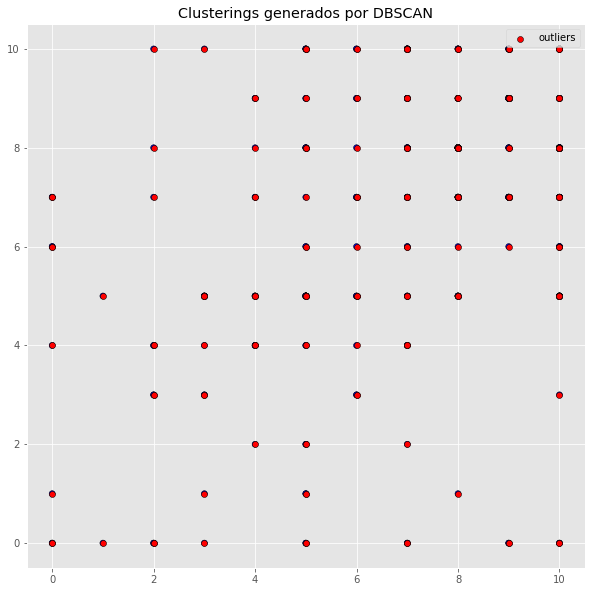

In [ ]:
# Clasificación
# ==============================================================================
labels = modelo_dbscan.labels_

fig, ax = plt.subplots(1, 1, figsize=(10.0, 10.0))

ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = labels,
    marker    = 'o',
    edgecolor = 'black'
)

# Los outliers se identifican con el label -1
ax.scatter(
    x = X[labels == -1, 0],
    y = X[labels == -1, 1], 
    c = 'red',
    marker    = 'o',
    edgecolor = 'black',
    label = 'outliers'
)

ax.legend()
ax.set_title('Clusterings generados por DBSCAN');

In [ ]:
# Número de clusters y observaciones "outliers"
# ==============================================================================
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise    = list(labels).count(-1)

print(f'Número de clusters encontrados: {n_clusters}')
print(f'Número de outliers encontrados: {n_noise}')

Número de clusters encontrados: 5
Número de outliers encontrados: 217


## **Otro algoritmo pero tambien con dbscan**

In [ ]:
class dbscan:

  def __init__(self, distance = 'euclidean'):
    self.distance = distance

  def find_distance(self, x, type = 'euclidean'):
    """
    Finds distance between numpy arrays.
    """
    return distance.squareform(distance.pdist(x, type))

  def normalization(self, x):
    return (x-np.min(x))/(np.max(x) - np.min(x))

In [ ]:
class dbscan:

  def __init__(self, epsilon = None, distance = 'euclidean', normalize = False):
    self.epsilon = epsilon
    self.min_samples = min_samples
    self.distance = distance
    self.normalize = normalize

  def find_distance(self, x, type = 'euclidean'):
    """
    Finds distance between numpy arrays.
    """
    return distance.squareform(distance.pdist(x, type))

  def normalization(self, x):
    return (x-np.min(x))/(np.max(x) - np.min(x))

  def find_neighbors(self, x):
    return np.where(x <= self.epsilon)[0]

In [ ]:
class dbscan:

  def __init__(self, epsilon = None, min_samples = None, distance = 'euclidean', normalize = False):
    self.epsilon = epsilon
    self.min_samples = min_samples
    self.distance = distance
    self.normalize = normalize

  def find_distance(self, x, type = 'euclidean'):
    """
    Finds distance between numpy arrays.
    """
    return distance.squareform(distance.pdist(x, type))

  def normalization(self, x):
    return (x-np.min(x))/(np.max(x) - np.min(x))

  def find_neighbors(self, x):
    return np.where(x <= self.epsilon)[0]
  
  def expand_cluster(self, neighbors, x, cluster, labels):

    # Iterate over each neighbor
    for neighbor in neighbors:
      
      # Check that is not assigned
      if labels[neighbor] == 0:

        # Find neighbors
        neighbor_neighbors = self.find_neighbors(x[neighbor])
        
        # Check if is core
        if len(neighbor_neighbors) >= self.min_samples:
            labels[neighbor] = cluster

            # For each neighbor in neighbors, expand cluster
            labels = self.expand_cluster(neighbor_neighbors, x, cluster, labels)
      
    return labels

In [ ]:
class dbscan:

  def __init__(self, epsilon = None, min_samples = None, distance = 'euclidean', normalize = False):
    self.epsilon = epsilon
    self.min_samples = min_samples
    self.distance = distance
    self.normalize = normalize

  def find_distance(self, x, type = 'euclidean'):
    """
    Finds distance between numpy arrays.
    """
    return distance.squareform(distance.pdist(x, type))

  def normalization(self, x):
    return (x-np.min(x))/(np.max(x) - np.min(x))

  def find_neighbors(self, x):
    return np.where(x <= self.epsilon)[0]
  
  def expand_cluster(self, neighbors, x, cluster, labels):

    # Iterate over each neighbor
    for neighbor in neighbors:
      
      # Check that is not assigned
      if labels[neighbor] == 0:

        # Find neighbors
        neighbor_neighbors = self.find_neighbors(x[neighbor])
        
        # Check if is core
        if len(neighbor_neighbors) >= self.min_samples:
            labels[neighbor] = cluster

            # For each neighbor in neighbors, expand cluster
            labels = self.expand_cluster(neighbor_neighbors, x, cluster, labels)
      
    return labels

  def fit(self, x):
    """
    Given a reference point and comparison points and a distance function, returns the index of the neighbors.
    """
    # Do normalization
    if self.normalize:
      x = self.normalization(x)

    # Find distance
    dist_matrix = self.find_distance(x, self.distance)

    # Initialize cluster
    cluster = 1
    n_obs = x.shape[0]
    labels = np.zeros(n_obs)

    for i in range(n_obs):
    
      # If value not assigned
      if labels[i] == 0:
        
        # Find neighbors
        neighbors = self.find_neighbors(dist_matrix[i])

        # Check if neighbors > min_samples (self included as neighbor)
        if len(neighbors) > self.min_samples:
        
          # If observation is not assigned --> Assign to cluster
          if labels[i] == 0:
            labels[i] = cluster

          # Expand cluster on neighbors
          labels = self.expand_cluster(neighbors, dist_matrix, cluster, labels)

          # Go to next cluster          
          cluster = cluster + 1

    return labels

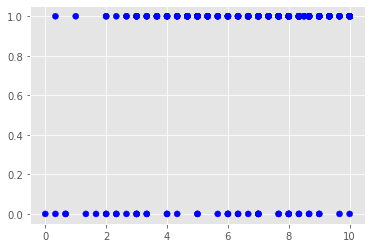

In [ ]:
db['dbscan_custom'] = dbscan(epsilon=32, min_samples=5).fit(db[['promedio', 'Resp_tec']].to_numpy())

plt.scatter(
    db['promedio'],
    db['Comp_TI'],
    c = db['dbscan_custom']
)

# **MODELO CON RAMDOM FOREST**

**Importar los módulos de librerias requeridos**

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

**Se generará el dataset**

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving DF_GradRespTecn2.csv to DF_GradRespTecn2.csv
User uploaded file "DF_GradRespTecn2.csv" with length 8715 bytes


In [ ]:
# Se crea el dataframe
import pandas as pd
import numpy as np
df=pd.read_csv("DF_GradRespTecn2.csv")
df=df.replace(np.nan,"0")
df

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


In [ ]:
db=df.dropna() 
db

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Validar_inf                 266 non-null    int64  
 1   Uso_adecuado_tecnologíaadt  266 non-null    int64  
 2   Espacios_virtuales          266 non-null    object 
 3   promedio                    266 non-null    float64
 4   Resp_tec                    266 non-null    int64  
 5   Comp_TI                     266 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 12.6+ KB


In [ ]:
db=df.dropna() 
db

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


In [ ]:
df[["promedio",	"Comp_TI"]]

,promedio,Comp_TI
0,4.000000,1
1,4.000000,1
2,6.333333,1
3,9.000000,1
4,4.000000,1
...,...,...
261,3.666667,1
262,9.333333,1
263,7.000000,0
264,6.000000,1


In [ ]:
# Using Series.values.tolist()
col_listr = df["Comp_TI"].values.tolist()
print(col_listr)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]


**Se realiza la limpieza de datos**

In [ ]:
db.isna().value_counts(dropna=False)

Validar_inf  Uso_adecuado_tecnologíaadt  Espacios_virtuales  promedio  Resp_tec  Comp_TI
False        False                       False               False     False     False      266
dtype: int64

In [ ]:
promedio = db["promedio"]
promedio

0      4.000000
1      4.000000
2      6.333333
3      9.000000
4      4.000000
         ...   
261    3.666667
262    9.333333
263    7.000000
264    6.000000
265    4.333333
Name: promedio, Length: 266, dtype: float64

In [ ]:
promedio.describe()

count    266.000000
mean       6.763158
std        2.353837
min        0.000000
25%        5.000000
50%        7.333333
75%        8.500000
max       10.000000
Name: promedio, dtype: float64

In [ ]:
COMPTI= db["Comp_TI"]
COMPTI

0      1
1      1
2      1
3      1
4      1
      ..
261    1
262    1
263    0
264    1
265    1
Name: Comp_TI, Length: 266, dtype: int64

**Se realiza la clasificación de datos para entrenamiento y testeo**

In [ ]:
# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        db.drop(columns = "Comp_TI"),
                                        db['Comp_TI'],
                                        random_state = 22
                                    )
# Creación del modelo
# ==============================================================================
modelo = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'mse',
            max_depth   = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = 1,
            random_state = 266
         )

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', n_estimators=10, n_jobs=1,
                      random_state=266)

In [ ]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = True
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.10045315404552084


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion '

Valor óptimo de n_estimators: 121


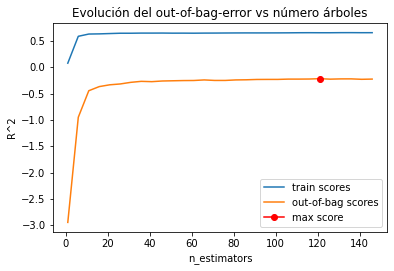

In [ ]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 50
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")


El error de testeo es de poco mas del 10%. Falta el cálculo de la acuracy



In [ ]:
# importar paquetes importantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# tamaño de la figura en pulgadas
rcParams["figure.figsize"] = 10, 6
np.random.seed(22)

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving DF_GradRespTecn2.csv to DF_GradRespTecn2 (1).csv
User uploaded file "DF_GradRespTecn2.csv" with length 8715 bytes


In [ ]:
# Cargar conjunto de datos 
import pandas as pd
import numpy as np
df=pd.read_csv("DF_GradRespTecn2.csv")  # Se crea el dataframe
df=df.replace(np.nan,"0")
df

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


In [ ]:
# mostrar columnas
df.columns

Index(['Validar_inf', 'Uso_adecuado_tecnologíaadt', 'Espacios_virtuales',
       'promedio', 'Resp_tec', 'Comp_TI'],
      dtype='object')

In [ ]:
# dividir los datos en características de entrada y de destino

X = df.drop("Comp_TI", axis=1)
y = df["Comp_TI"]

In [ ]:
# estandarizar el conjunto de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# dividir en conjunto de entrenamiento (train) y 
#conjunto de prueba (test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=22)

In [ ]:
# crear el clasificador
classifier = RandomForestClassifier(n_estimators=100)

# Entrenar el modelo usando el conjunto de entranamiento
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# predicción en el conjunto de prueba
y_pred = classifier.predict(X_test)

In [ ]:
# Calcular la precisión del modelo
print("Precisión:", accuracy_score(y_test, y_pred))

Precisión: 0.7407407407407407


In [ ]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

,feature,importance
3,promedio,0.314354
2,Espacios_virtuales,0.197066
0,Validar_inf,0.193941
1,Uso_adecuado_tecnologíaadt,0.178808
4,Resp_tec,0.115831


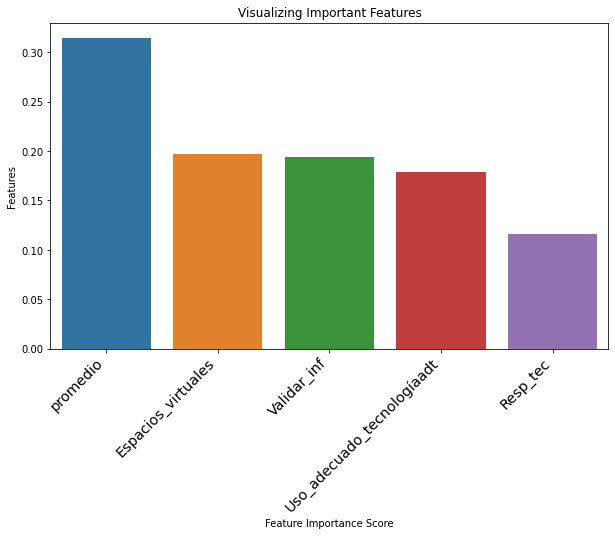

In [ ]:
# visualizarcaracterísticas importantes

# Crear un diagrama de barras
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# agregar estiquestas

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

In [ ]:
# cargar datos con características seleccionadas
X = df.drop(["Comp_TI", "Validar_inf"], axis=1)
y = df["Comp_TI"]

# estandarizar el conjunto de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# dividir en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
X_scaled, y, stratify=y, test_size=0.10, random_state=22)


In [ ]:
# crear clasificador
clf = RandomForestClassifier(n_estimators=100)

# Entrenar el modelo usando el conjunto de entrenamiento
clf.fit(X_train, y_train)

# predicción en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo,
print("Precisión:", accuracy_score(y_test, y_pred))

Precisión: 0.7407407407407407
